In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import re
import string

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline


df = pd.read_csv('Heart Attack Data Set.csv')
df.head()

X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
scaled_X_train[0][:]

array([0.11904762, 1.        , 0.        , 0.19047619, 0.09360731,
       0.        , 0.        , 0.26530612, 1.        , 0.35714286,
       0.5       , 0.        , 1.        ])

In [2]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(13,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                196       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 30        
Total params: 436
Trainable params: 436
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [3]:
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=15,
                    batch_size=5,                                   
                    validation_split=0.25,
                    verbose = 2)

Epoch 1/15
18/18 - 0s - loss: 0.6808 - accuracy: 0.4889 - val_loss: 0.6671 - val_accuracy: 0.5484
Epoch 2/15
18/18 - 0s - loss: 0.6751 - accuracy: 0.5000 - val_loss: 0.6609 - val_accuracy: 0.5806
Epoch 3/15
18/18 - 0s - loss: 0.6704 - accuracy: 0.5111 - val_loss: 0.6565 - val_accuracy: 0.5806
Epoch 4/15
18/18 - 0s - loss: 0.6636 - accuracy: 0.5667 - val_loss: 0.6487 - val_accuracy: 0.5806
Epoch 5/15
18/18 - 0s - loss: 0.6572 - accuracy: 0.6111 - val_loss: 0.6367 - val_accuracy: 0.6129
Epoch 6/15
18/18 - 0s - loss: 0.6479 - accuracy: 0.6556 - val_loss: 0.6239 - val_accuracy: 0.7742
Epoch 7/15
18/18 - 0s - loss: 0.6376 - accuracy: 0.7111 - val_loss: 0.6101 - val_accuracy: 0.8387
Epoch 8/15
18/18 - 0s - loss: 0.6265 - accuracy: 0.7444 - val_loss: 0.5972 - val_accuracy: 0.9355
Epoch 9/15
18/18 - 0s - loss: 0.6144 - accuracy: 0.7556 - val_loss: 0.5788 - val_accuracy: 0.9355
Epoch 10/15
18/18 - 0s - loss: 0.6024 - accuracy: 0.7556 - val_loss: 0.5576 - val_accuracy: 0.9677
Epoch 11/15
18/18 -

In [4]:
def show_some(arr):
    loss_values = arr["loss"]
    val_loss_values = arr["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()

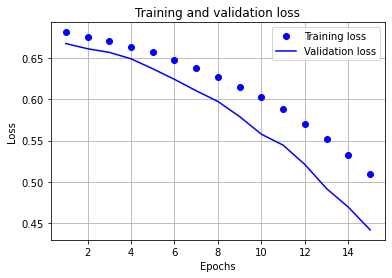

In [5]:

history_dict = history.history
show_some(history_dict)

In [6]:
score = model.evaluate(scaled_X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5440478324890137
Test accuracy: 0.7582417726516724


In [7]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(13,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                196       
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 30        
Total params: 436
Trainable params: 436
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'fo

In [8]:
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=15,
                    batch_size=5,                                   
                    validation_split=0.25,
                    verbose = 2)

Epoch 1/15
18/18 - 0s - loss: 0.8184 - accuracy: 0.4444 - val_loss: 0.6830 - val_accuracy: 0.5161
Epoch 2/15
18/18 - 0s - loss: 0.7620 - accuracy: 0.5000 - val_loss: 0.6799 - val_accuracy: 0.5161
Epoch 3/15
18/18 - 0s - loss: 0.7470 - accuracy: 0.4778 - val_loss: 0.6771 - val_accuracy: 0.5806
Epoch 4/15
18/18 - 0s - loss: 0.7218 - accuracy: 0.5444 - val_loss: 0.6745 - val_accuracy: 0.5806
Epoch 5/15
18/18 - 0s - loss: 0.7278 - accuracy: 0.5333 - val_loss: 0.6738 - val_accuracy: 0.6129
Epoch 6/15
18/18 - 0s - loss: 0.7404 - accuracy: 0.4444 - val_loss: 0.6729 - val_accuracy: 0.7419
Epoch 7/15
18/18 - 0s - loss: 0.7254 - accuracy: 0.5667 - val_loss: 0.6694 - val_accuracy: 0.7419
Epoch 8/15
18/18 - 0s - loss: 0.7017 - accuracy: 0.5333 - val_loss: 0.6656 - val_accuracy: 0.7419
Epoch 9/15
18/18 - 0s - loss: 0.7194 - accuracy: 0.5000 - val_loss: 0.6649 - val_accuracy: 0.8387
Epoch 10/15
18/18 - 0s - loss: 0.7144 - accuracy: 0.5111 - val_loss: 0.6624 - val_accuracy: 0.8710
Epoch 11/15
18/18 -

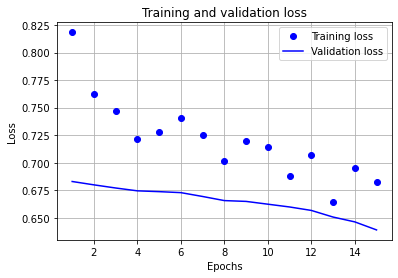

In [9]:
history_dict = history.history
show_some(history_dict)

In [10]:
model =  keras.Sequential()

model.add(layers.Dense(14, input_shape=(13,)))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('softmax')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(14))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.3))

model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 14)                196       
_________________________________________________________________
batch_normalization (BatchNo (None, 14)                56        
_________________________________________________________________
activation (Activation)      (None, 14)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                210       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
activation_1 (Activation)    (None, 14)               

In [11]:
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=15,
                    batch_size=5,                                   
                    validation_split=0.25,
                    verbose = 2)

Epoch 1/15
18/18 - 0s - loss: 0.8061 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.4839
Epoch 2/15
18/18 - 0s - loss: 0.7893 - accuracy: 0.4778 - val_loss: 0.6949 - val_accuracy: 0.4839
Epoch 3/15
18/18 - 0s - loss: 0.7888 - accuracy: 0.5444 - val_loss: 0.6919 - val_accuracy: 0.5161
Epoch 4/15
18/18 - 0s - loss: 0.7777 - accuracy: 0.5556 - val_loss: 0.6899 - val_accuracy: 0.5161
Epoch 5/15
18/18 - 0s - loss: 0.7221 - accuracy: 0.5778 - val_loss: 0.6869 - val_accuracy: 0.5161
Epoch 6/15
18/18 - 0s - loss: 0.7582 - accuracy: 0.5111 - val_loss: 0.6825 - val_accuracy: 0.5161
Epoch 7/15
18/18 - 0s - loss: 0.6806 - accuracy: 0.6000 - val_loss: 0.6786 - val_accuracy: 0.5806
Epoch 8/15
18/18 - 0s - loss: 0.6971 - accuracy: 0.5222 - val_loss: 0.6727 - val_accuracy: 0.6452
Epoch 9/15
18/18 - 0s - loss: 0.6972 - accuracy: 0.5556 - val_loss: 0.6672 - val_accuracy: 0.7419
Epoch 10/15
18/18 - 0s - loss: 0.7043 - accuracy: 0.5778 - val_loss: 0.6627 - val_accuracy: 0.8065
Epoch 11/15
18/18 -

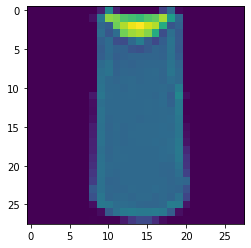

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() #train - 60_000 of 28x28 imgs, test - 10_000 of 28x28 imgs

plt.imshow(X_train_full[2])
X_train = X_train_full[:5000] / 255.0
y_train = y_train_full[:5000]
X_test = X_test[:5000] / 255.0
y_test = y_test[:5000]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


In [13]:
model = keras.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)        

In [14]:
monitor = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, monitor='val_accuracy', restore_best_weights=True)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1, callbacks=[monitor])

Epoch 1/15
125/125 [==============================] - 7s 60ms/step - loss: 0.7719 - accuracy: 0.7343 - val_loss: 2.6275 - val_accuracy: 0.2460
Epoch 2/15
125/125 [==============================] - 7s 58ms/step - loss: 0.4605 - accuracy: 0.8350 - val_loss: 2.4703 - val_accuracy: 0.3030
Epoch 3/15
125/125 [==============================] - 7s 54ms/step - loss: 0.3680 - accuracy: 0.8622 - val_loss: 1.7906 - val_accuracy: 0.5190
Epoch 4/15
125/125 [==============================] - 7s 56ms/step - loss: 0.3067 - accuracy: 0.8860 - val_loss: 0.6765 - val_accuracy: 0.7410
Epoch 5/15
125/125 [==============================] - 7s 57ms/step - loss: 0.2590 - accuracy: 0.9030 - val_loss: 0.4228 - val_accuracy: 0.8500
Epoch 6/15
125/125 [==============================] - 7s 56ms/step - loss: 0.2081 - accuracy: 0.9240 - val_loss: 0.3098 - val_accuracy: 0.8850
Epoch 7/15
125/125 [==============================] - 7s 54ms/step - loss: 0.1600 - accuracy: 0.9425 - val_loss: 0.3299 - val_accuracy: 0.8900

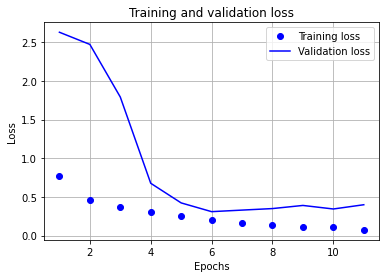

In [15]:
show_some(history.history)

In [2]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)

text_data = pd.read_csv('fake_or_real_news.csv', encoding='latin-1')

text_data = text_data.drop(columns=['Unnamed: 0','title'], axis = 1)


text_data_train = text_data.loc[:2534]
text_data_test = text_data.loc[2534:]

positive_data_train = text_data_train[text_data_train.label == 'REAL']
negative_data_train = text_data_train[text_data_train.label == 'FAKE']
extreme_data_train = pd.concat([positive_data_train, negative_data_train])
extreme_data_train["label"] = extreme_data_train.label.apply(lambda i : 1 if i=='REAL' else 0)

positive_data_test = text_data_test[text_data_test.label == 'REAL']
negative_data_test = text_data_test[text_data_test.label == 'FAKE']
extreme_data_test = pd.concat([positive_data_test, negative_data_test])
extreme_data_test["label"] = extreme_data_test.label.apply(lambda i : 1 if i=='REAL' else 0)

X_train = extreme_data_train['text']
X_test = extreme_data_test['text']
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
y_train = extreme_data_train["label"]
y_test = extreme_data_test["label"]

print('max phrase len: {0}'.format(max_phrase_len))


max phrase len: 15199


In [3]:
max_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words= max_words, filters=' !"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_phrase_len)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train

array([[   0,    0,    0, ...,    3, 5743,   22],
       [   0,    0,    0, ...,  522,  230,    6],
       [   0,    0,    0, ...,  519,  815,  111],
       ...,
       [   0,    0,    0, ..., 2478,   36, 2193],
       [   0,    0,    0, ..., 5297,    4, 9615],
       [   0,    0,    0, ..., 1208,  411,  563]])

In [4]:
emb_dim = 128

model = keras.Sequential()
model.add(layers.Embedding(input_dim = max_words, output_dim = emb_dim, input_length = max_phrase_len))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(emb_dim, dropout = 0.2, recurrent_dropout = 0.2))
model.add(layers.Dense(emb_dim, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation = 'softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.25,
                    verbose = 2)
print(model.summary())

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_phrase_len)
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])